# Data Science and Business Analytics

# Prediction using Tree Algorithm

## Level - Intermediate

**Create a Decsion Tree Classifier and Visualize it graphically.**

**Purpose is if we feed a new data to the classifier, it would be able to predict the right class accordingly.**

> **Dataset:** https://bit.ly/3kXTdox

> **Sample Solution:** https://bit.ly/2G6sYx9

### About Decision Tree Classifier

*Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.*

### Importing Necessary Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

### Importing the Required(IRIS) DatatSet

In [20]:
data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
# Visualize Top - 5 Entries in Dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Visualize Bottom - 5 Entries in Dataset
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data Preprocessing and Vizualisation

In [23]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#### CountPlot

C:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


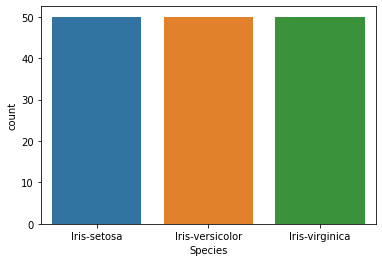

In [26]:
sns.countplot(data['Species'])
plt.show()

#### ScatterPlot

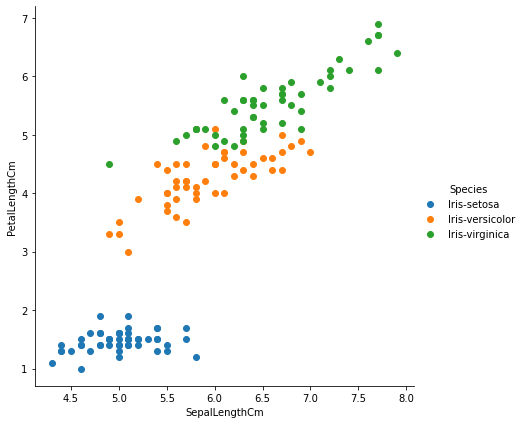

In [27]:
sns.FacetGrid(data, hue ="Species",height = 6).map(plt.scatter, 'SepalLengthCm', 'PetalLengthCm').add_legend()
plt.show()

#### PairPlot

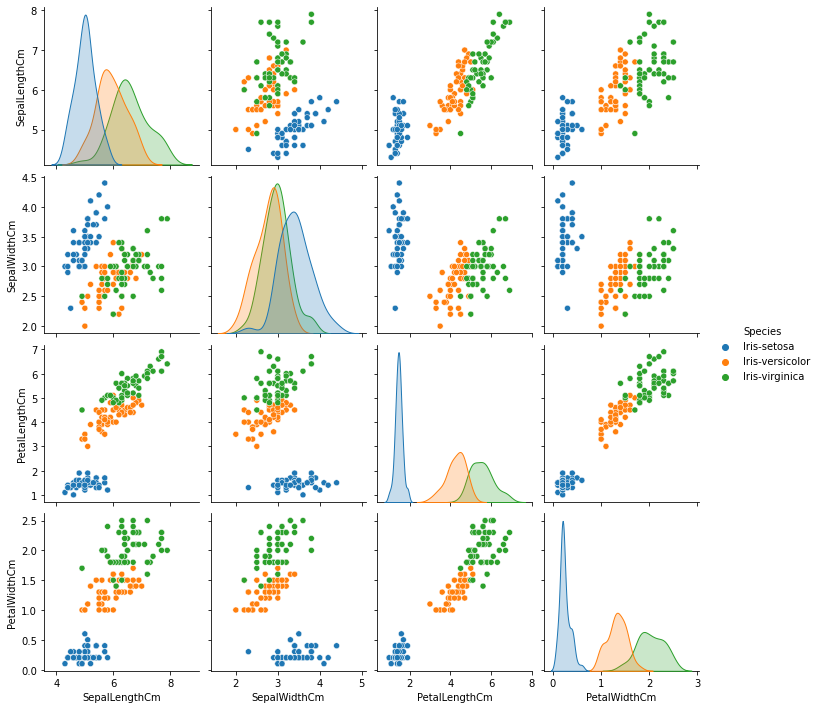

In [28]:
sns.pairplot(data, hue="Species")
plt.show()

#### Preprocessing

In [29]:
data['Species']=np.where(data.Species=='Iris-virginica',3,np.where(data.Species=='Iris-versicolor',2,1))

In [30]:
data['Species']

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int32

In [31]:
data['Species'].unique()

array([1, 2, 3])

In [32]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [33]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [35]:
type(data[['Species']])

pandas.core.frame.DataFrame

### Model Building

In [36]:
X_train, X_test, y_train, y_test =  train_test_split(
    data[cols],
    data[['Species']],
    test_size= 0.25,
    random_state= 5
)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [40]:
param_grid = {'max_depth': np.arange(2, 8),'max_features': np.arange(2,5)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [43]:
tree.best_score_ * 100

97.27272727272727

In [44]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=2)

In [46]:
train_pred = tree.predict(X_train)
train_pred

array([1, 3, 3, 2, 1, 1, 2, 3, 2, 3, 3, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 3, 1, 1,
       2, 1, 1, 3, 2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2, 2, 1, 2,
       3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 2, 3, 1, 2, 1, 1, 3, 2, 3, 1, 3, 1,
       3, 1, 2, 1, 3, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 3, 1, 3, 1, 2, 3,
       3, 2])

In [47]:
test_pred = tree.predict(X_test)
test_pred

array([2, 2, 3, 1, 3, 2, 1, 3, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 2, 3,
       1, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 3])

#### Classification Report

In [50]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.87      0.93      0.90        14
           3       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



### Building - Final Decision Tree Classifier

 **After Analysing the best Hypermeters.**

In [51]:
clf_tree = DecisionTreeClassifier(max_depth= 2, max_features= 2)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=2)

### **Pictorial Representation**

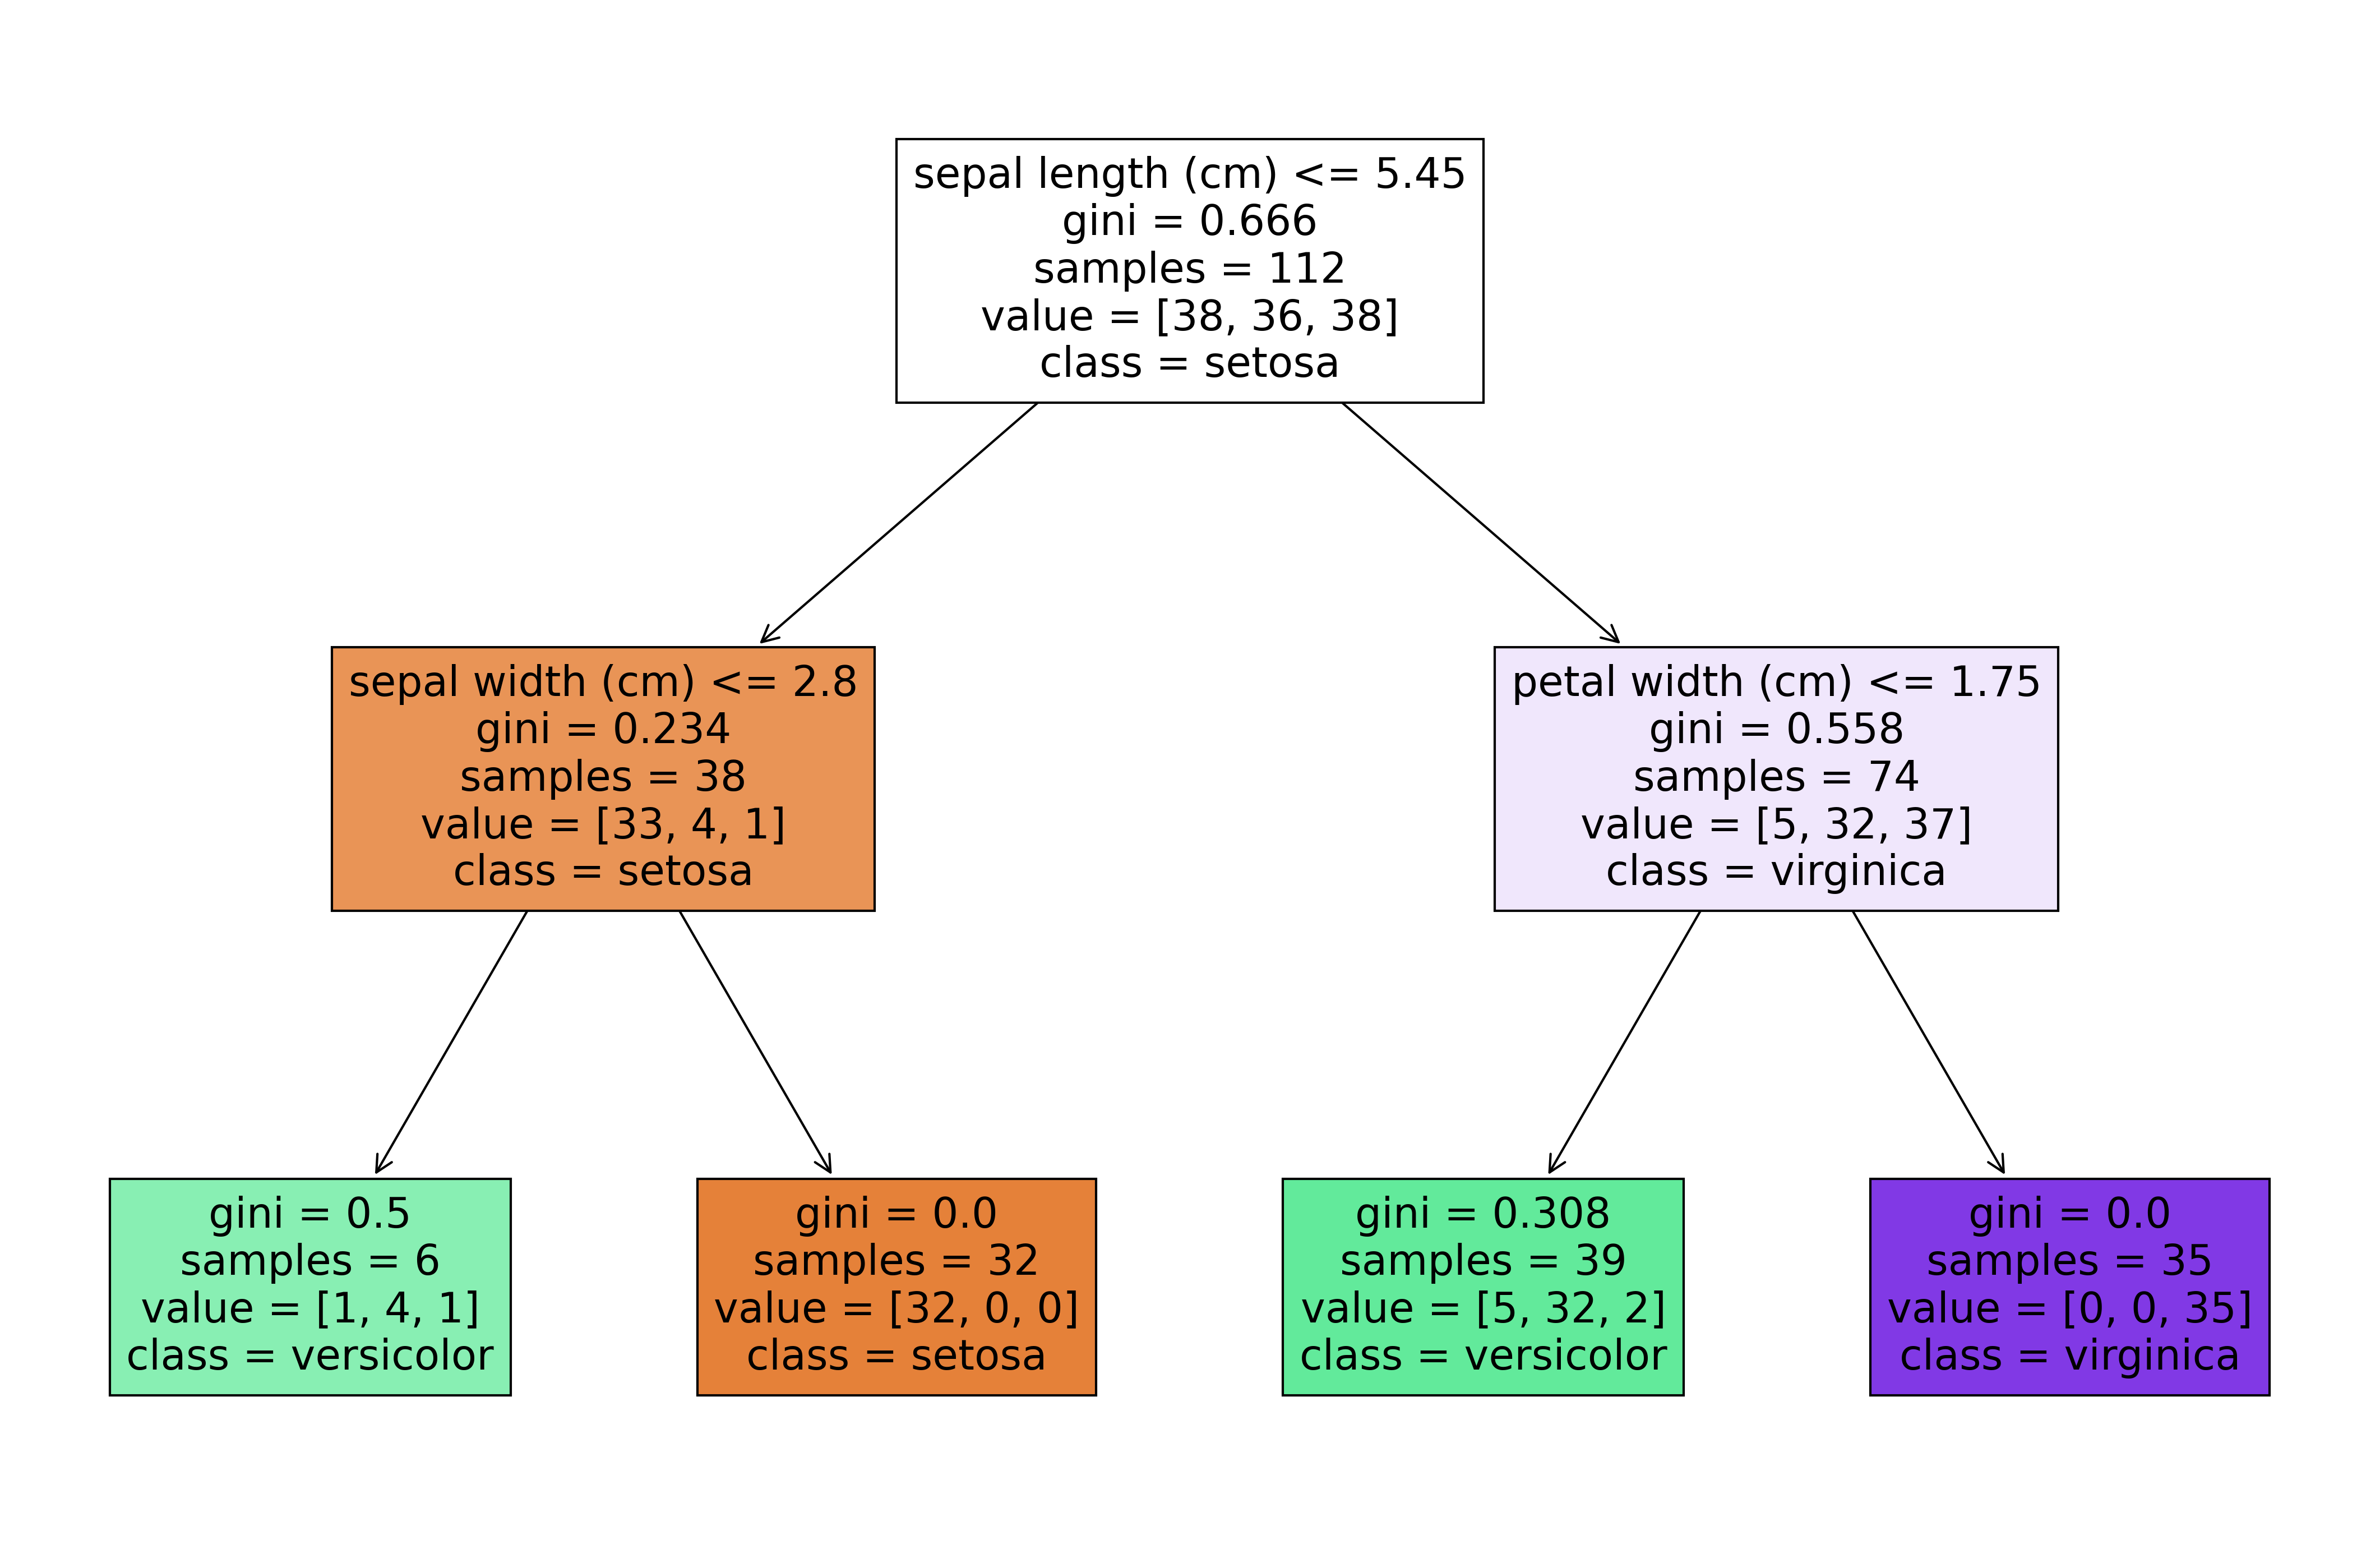

In [54]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (18,12), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);